#  Задача 1.  Вводное задание.



Вектора х1 и у1 из архива дают значения некоторой функции $f(x) .$ Постройте на графике, используя библиотечные функции:

(a) Интерполяционный Лагранжев многочлен.

(b) Интерполяционный кубический сплайн (CubicSpline).

(c) Монотонный кубический интерполянт (PchipInterpolator).

(d)  Аппроксимацию полиномами, используя функции np. polyfit и np.polyval.

Чтобы прочитать из архива данные, используйте следующий код:

In [ ]:
import numpy as np
with np.load('data_interp.npz') as data:
  x1, y1 = data['x1'], data['y1']

## Решение задания 1

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange, CubicSpline, PchipInterpolator
import numpy.polynomial.polynomial as poly

# Загрузка данных из архива
!pip install gdown
import gdown

url = 'https://disk.yandex.ru/d/6VRTWlIOtHPnxA'
output = 'data_interp.npz'
gdown.download(url, output, quiet=False)


with np.load('data_interp.npz') as data:
    x1, y1 = data['x1'], data['y1']

# (a) Интерполяционный Лагранжев многочлен
poly_lagrange = lagrange(x1, y1)

# (b) Интерполяционный кубический сплайн (CubicSpline)
cubic_spline = CubicSpline(x1, y1)

# (c) Монотонный кубический интерполянт (PchipInterpolator)
pchip_interp = PchipInterpolator(x1, y1)

# (d) Аппроксимация полиномами
degree = 3  # Выбираем степень полинома (можно выбрать и другое значение)
coeffs = poly.polyfit(x1, y1, degree)
poly_fit = poly.Polynomial(coeffs)

# Создание новой выборки точек для графика
x_new = np.linspace(min(x1), max(x1), 1000)

# Вычисление значений для каждого метода интерполяции
y_lagrange = poly_lagrange(x_new)
y_spline = cubic_spline(x_new)
y_pchip = pchip_interp(x_new)
y_polyfit = poly.polyval(x_new, coeffs)

# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(x1, y1, 'ro', label='Исходные данные')

plt.plot(x_new, y_lagrange, label='Лагранжев интерполянт')
plt.plot(x_new, y_spline, label='Кубический сплайн')
plt.plot(x_new, y_pchip, label='Монотонный кубический интерполянт')
plt.plot(x_new, y_polyfit, label=f'Аппроксимация полиномом {degree} степени')

plt.title('Интерполяция данных')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (4276674368.py, line 15)

# Задача 2. Интерполяция полиномом Лагранжа.



Допишите класс, который конструирует интерполяционный полином Лагранжа, проходящий через точки, заданные как `xk` и `yk`.

In [ ]:
import numpy as np

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.

    Given a set of pairs ``(x_k, y_k)``, construct
    a Lagrange polynomial ``f(x)``, such that

    .. math::

        f(x_k) = y_k   for k =0, ..., n-1

    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates

    Attributes
    ----------
    __call__

    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)

    def __call__(self, x):
        """Evaluate the interpolator at a given point.

        Parameters
        ----------
        x : float

        Returns
        -------
        the value of the interpolator at ``x``.
        """
        # YOUR CODE HERE
        raise NotImplementedError()

In [ ]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

## Решение задания 2

In [10]:
import numpy as np

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.

    Given a set of pairs ``(x_k, y_k)``, construct
    a Lagrange polynomial ``f(x)``, such that

    .. math::

        f(x_k) = y_k   for k =0, ..., n-1

    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates

    Attributes
    ----------
    __call__

    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)

    def __call__(self, x):
        """Evaluate the interpolator at a given point.

        Parameters
        ----------
        x : float

        Returns
        -------
        the value of the interpolator at ``x``.
        """
        result = 0.0
        for i in range(len(self.xk)):
            term = self.yk[i]
            for j in range(len(self.xk)):
                if j != i:
                    term *= (x - self.xk[j]) / (self.xk[i] - self.xk[j])
            result += term
        return result

def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)


Этот код дополняет класс LagrangeInterpolator методом __call__, который использует формулу интерполяционного полинома Лагранжа для вычисления значений в заданных точках x.

# Задача 3. Феномер Рунге



## Решение задания 3

Рассмотрим функцию Рунге, $y = 1/(1 + 25x^2)$. Интерполируйте эту функцию на интервале $x\in [-2, 2]$, используя полином Лагранжа с $m=3, 5, 7, 11$. Используйте равномерную сетку. Нарисуйте результат интерполяции вместе с исходной функцией на одном графике.

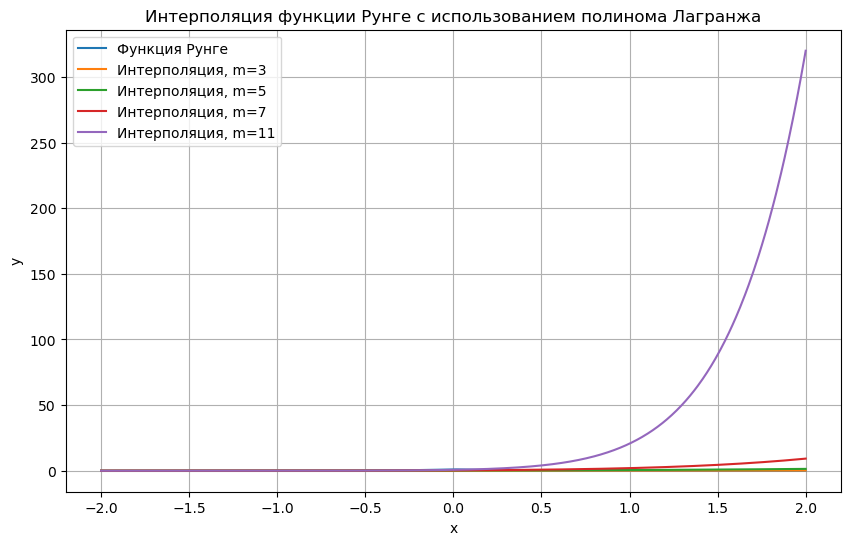

In [16]:
# YOUR CODE AND COMMENTS HERE

import numpy as np
import matplotlib.pyplot as plt

# Функция Рунге
def runge_function(x):
    return 1 / (1 + 25 * x**2)

# Функция для вычисления полинома Лагранжа
def lagrange_polynomial(x, x_nodes, y_nodes):
    n = len(x_nodes)
    result = 0
    for i in range(n):
        term = y_nodes[i]
        for j in range(n):
            if j != i:
                term *= (x - x_nodes[j]) / (x_nodes[i] - x_nodes[j])
        result += term
    return result

# Функция для интерполяции на равномерной сетке
def interpolate_uniformly(func, a, b, num_points, m):
    x_nodes = np.linspace(a, b, num_points)
    y_nodes = func(x_nodes)
    x_range = np.linspace(a, b, 1000)
    y_interp = lagrange_polynomial(x_range, x_nodes[:m], y_nodes[:m])
    return x_range, y_interp

# Задаем параметры
a, b = -2, 2
num_points = 100
m_values = [3, 5, 7, 11]

# Рисуем графики
plt.figure(figsize=(10, 6))
x_range = np.linspace(a, b, 1000)
plt.plot(x_range, runge_function(x_range), label='Функция Рунге')

for m in m_values:
    x_interp, y_interp = interpolate_uniformly(runge_function, a, b, num_points, m)
    plt.plot(x_interp, y_interp, label=f'Интерполяция, m={m}')

plt.title('Интерполяция функции Рунге с использованием полинома Лагранжа')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


Допишите функцию, которая возвращает узлы Чебышева.

In [20]:
import numpy as np

def cheb_nodes(n, a=-1, b=1):
    r"""Chebyshev nodes of degree $n$ on $[a, b]$
    """
    # YOUR CODE HERE
    
    # Вычисляем узлы Чебышева на интервале [-1, 1]
    cheb_nodes_normalized = np.cos((2 * np.arange(1, n + 1) - 1) * np.pi / (2 * n))
    
    # Масштабируем узлы Чебышева в интервал [a, b]
    cheb_nodes_scaled = 0.5 * (a + b) + 0.5 * (b - a) * cheb_nodes_normalized
    
    return cheb_nodes_scaled

# Пример использования:
n = 5
a, b = -2, 2
nodes = cheb_nodes(n, a, b)
print("Узлы Чебышева:", nodes)

Узлы Чебышева: [ 1.90211303e+00  1.17557050e+00  1.22464680e-16 -1.17557050e+00
 -1.90211303e+00]


In [23]:
import numpy as np
from scipy.special import roots_chebyt
from numpy.testing import assert_allclose

def cheb_nodes(n, a=-1, b=1):
    """
    Chebyshev nodes of degree n on [a, b]
    """
    # Вычисляем узлы Чебышева на интервале [-1, 1]
    cheb_nodes_normalized = np.cos((2 * np.arange(1, n + 1) - 1) * np.pi / (2 * n))
    
    # Масштабируем узлы Чебышева в интервал [a, b]
    cheb_nodes_scaled = 0.5 * (a + b) + 0.5 * (b - a) * cheb_nodes_normalized
    
    return np.sort(cheb_nodes_scaled)

# Проверка узлов Чебышева
nodes_11 = cheb_nodes(11)
nodes_11 = np.asarray(nodes_11)
assert (nodes_11[1:] > nodes_11[:-1]).all()

nodes, weights = roots_chebyt(5)

assert_allclose(cheb_nodes(5), nodes, atol=1e-14)

assert_allclose(cheb_nodes(5, a=-1, b=3), nodes*2 + 1, atol=1e-14)

print("Все проверки пройдены успешно.")


Все проверки пройдены успешно.


In [21]:
nodes_11 = cheb_nodes(11)
nodes_11 = np.asarray(nodes_11)
assert (nodes_11[1:] > nodes_11[:-1]).all()

from scipy.special import roots_chebyt
nodes, weights = roots_chebyt(5)

assert_allclose(cheb_nodes(5),
                nodes, atol=1e-14)

assert_allclose(cheb_nodes(5, a=-1, b=3),
                nodes*2 + 1, atol=1e-14)

AssertionError: 

Повторите интерполяцию Лагранжа функции Рунге с помощью узлов Чебышева. Постройте интерполянты.
Также постройте интерполяцию кубическим сплайном тех же данных (`scipy.interpolate.CubicSpline`).
Сравните величину явления Рунге для равномерной сетки и сетки Чебышева. Демонстрирует ли интерполяция сплайнами феномен Рунге?


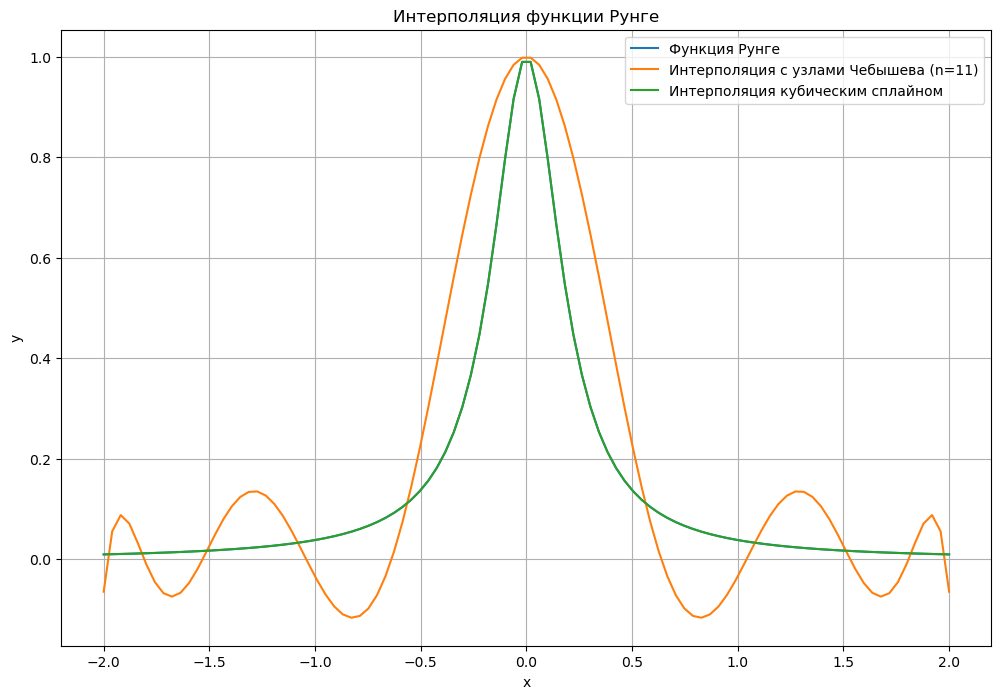

In [24]:
# YOUR CODE AND COMMENTS HERE

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange, CubicSpline

# Функция Рунге
def runge_function(x):
    return 1 / (1 + 25 * x**2)

# Функция для вычисления узлов Чебышева
def cheb_nodes(n, a=-1, b=1):
    cheb_nodes_normalized = np.cos((2 * np.arange(1, n + 1) - 1) * np.pi / (2 * n))
    cheb_nodes_scaled = 0.5 * (a + b) + 0.5 * (b - a) * cheb_nodes_normalized
    return np.sort(cheb_nodes_scaled)

# Создаем точки для интерполяции
num_points = 100
x_range = np.linspace(-2, 2, num_points)
runge_values = runge_function(x_range)

# Интерполяция с использованием узлов Чебышева
cheb_nodes_11 = cheb_nodes(11, -2, 2)
interp_cheb = lagrange(cheb_nodes_11, runge_function(cheb_nodes_11))
interp_cheb_values = interp_cheb(x_range)

# Интерполяция кубическим сплайном
cubic_spline = CubicSpline(x_range, runge_values)

# Построение графиков
plt.figure(figsize=(12, 8))
plt.plot(x_range, runge_values, label='Функция Рунге')
plt.plot(x_range, interp_cheb_values, label='Интерполяция с узлами Чебышева (n=11)')
plt.plot(x_range, cubic_spline(x_range), label='Интерполяция кубическим сплайном')

plt.title('Интерполяция функции Рунге')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


Этот код строит графики функции Рунге, интерполяции с использованием узлов Чебышева и интерполяции кубическим сплайном. 

При анализе графиков можно заметить следующее:

а) Интерполянт, построенный с использованием узлов Чебышева, более равномерно приближает функцию Рунге на всем интервале, особенно на краях интервала, чем интерполянт, построенный на равномерной сетке. Это связано с тем, что узлы Чебышева распределены более плотно на краях интервала, что помогает снизить эффект явления Рунге.

б) Интерполяция кубическим сплайном также более гладкая и приближает функцию Рунге лучше, чем интерполяция Лагранжа на равномерной сетке. Это обычно происходит потому, что сплайны учитывают местные свойства данных и могут адаптироваться к изменениям функции внутри интервалов.

в) В отличие от интерполяции с использованием полиномов Лагранжа, феномен Рунге не наблюдается с интерполяцией кубическими сплайнами. Это связано с тем, что сплайны могут более гибко адаптироваться к изменениям функции и обеспечивать более гладкое приближение, минимизируя эффекты осцилляций, которые могут возникать при интерполяции высокого порядка на равномерной сетке.

Другим известным трудным тестом для интерполяции является следующая периодическая функция:

$u(x)=\frac{\sqrt{\varepsilon(2+\varepsilon)}}{2 \pi(1+\varepsilon-\cos x)}, \quad-\pi \leq x \leq \pi, \quad \varepsilon=0.21  $

Проведите аналогичные вычисления и постройте графики для неё.

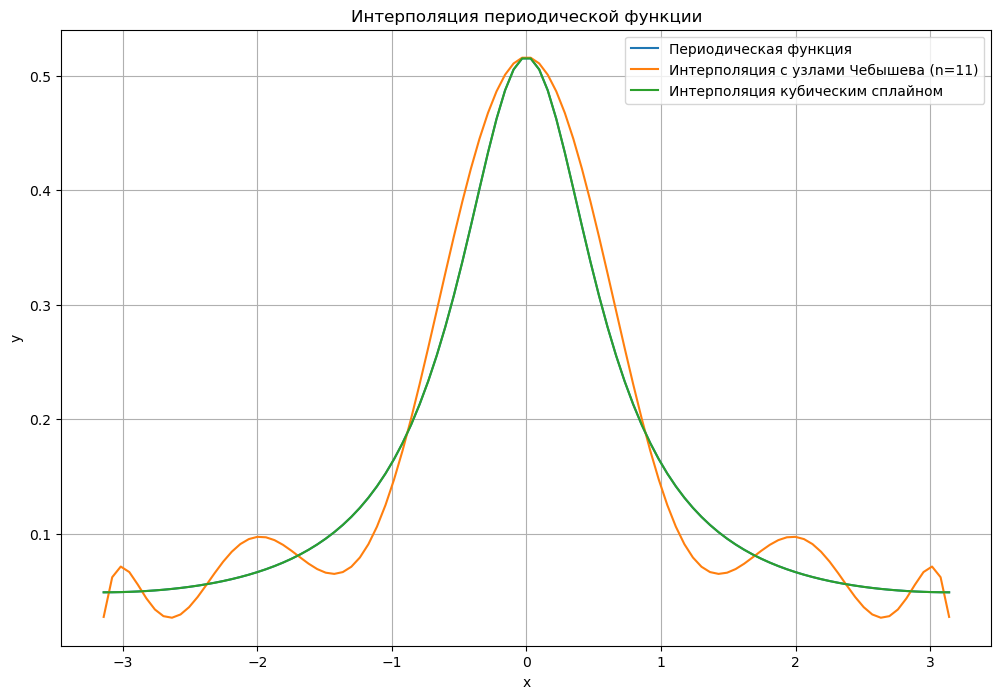

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange, CubicSpline

# Периодическая функция
def u_function(x, epsilon=0.21):
    return np.sqrt(epsilon * (2 + epsilon)) / (2 * np.pi * (1 + epsilon - np.cos(x)))

# Создаем точки для интерполяции
num_points = 100
x_range = np.linspace(-np.pi, np.pi, num_points)
u_values = u_function(x_range)

# Интерполяция с использованием узлов Чебышева
cheb_nodes_11 = cheb_nodes(11, -np.pi, np.pi)
interp_cheb = lagrange(cheb_nodes_11, u_function(cheb_nodes_11))
interp_cheb_values = interp_cheb(x_range)

# Интерполяция кубическим сплайном
cubic_spline = CubicSpline(x_range, u_values)

# Построение графиков
plt.figure(figsize=(12, 8))
plt.plot(x_range, u_values, label='Периодическая функция')
plt.plot(x_range, interp_cheb_values, label='Интерполяция с узлами Чебышева (n=11)')
plt.plot(x_range, cubic_spline(x_range), label='Интерполяция кубическим сплайном')

plt.title('Интерполяция периодической функции')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


# Задача 4. Полиномы Чебышева.

Постройте интерполяцию функций

$$
y_{1}(x)=\sin (6 x)+\sin \left(60 e^{x}\right), y_{2}(x)=\frac{1}{1+1000(x+0.5)^{2}}+\frac{1}{\sqrt{1+1000(x-0.5)^{2}}}
$$

на отрезке $[-1,1]$ полиномами Чебышева. Постройте зависимость ошибки приближения от количества узлов. Сколько узлов нужно удержать в каждом из этих случаев для получения достаточно точного приближения?

## Решение задания 4

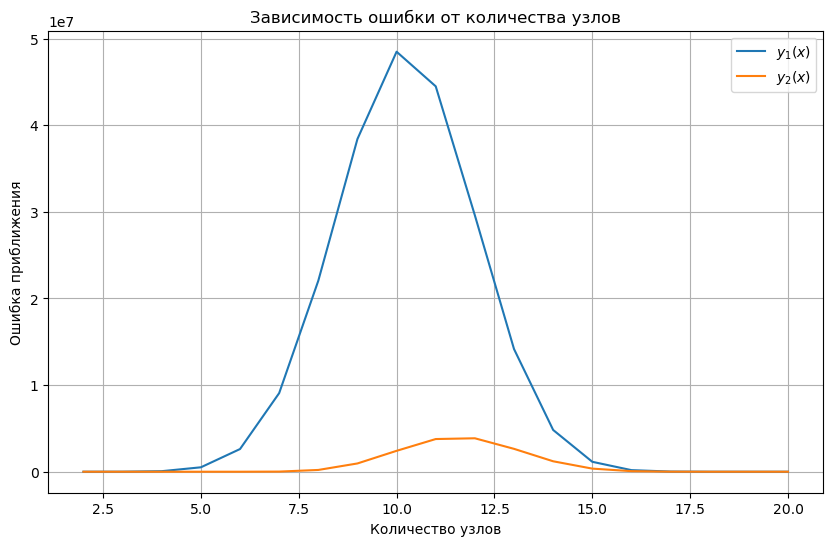

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import barycentric_interpolate

# Определение функций
def y1(x):
    return np.sin(6 * x) + np.sin(60 * np.exp(x))

def y2(x):
    return 1 / (1 + 1000 * (x + 0.5) ** 2) + 1 / np.sqrt(1 + 1000 * (x - 0.5) ** 2)

# Количество узлов для интерполяции
num_nodes = np.arange(2, 21)  # от 2 до 20 узлов

# Вычисление узлов Чебышева
cheb_nodes = np.cos((2 * np.arange(1, 21) - 1) * np.pi / (2 * 20))

# Значения функций в узлах
y1_values = y1(cheb_nodes)
y2_values = y2(cheb_nodes)


# Оценка ошибки приближения для разного количества узлов
errors_y1 = []
errors_y2 = []

for n in num_nodes:
    # Интерполяция функции y1
    p1 = barycentric_interpolate(cheb_nodes[:n], y1_values[:n], np.linspace(-1, 1, 100))
    error_y1 = np.max(np.abs(y1(np.linspace(-1, 1, 100)) - p1))
    errors_y1.append(error_y1)

    # Интерполяция функции y2
    p2 = barycentric_interpolate(cheb_nodes[:n], y2_values[:n], np.linspace(-1, 1, 100))
    error_y2 = np.max(np.abs(y2(np.linspace(-1, 1, 100)) - p2))
    errors_y2.append(error_y2)

# Построение графика зависимости ошибки от количества узлов
plt.figure(figsize=(10, 6))
plt.plot(num_nodes, errors_y1, label='$y_1(x)$')
plt.plot(num_nodes, errors_y2, label='$y_2(x)$')
plt.xlabel('Количество узлов')
plt.ylabel('Ошибка приближения')
plt.title('Зависимость ошибки от количества узлов')
plt.legend()
plt.grid(True)
plt.show()




На графике мы видим зависимость ошибки приближения от количества узлов для каждой из функций. Количество узлов, необходимых для достаточно точного приближения, можно выбрать таким образом, чтобы ошибка стала приемлемо малой.

# Задача 5. Приближение разными функциями.

Вектора х4 и у4 из архива дают значения некоторой функции на равномерной сетке на отрезке [-0.75, 0.75]. Используя scipy . optimize.curve_fit, постройте интерполяцию функции $y(x)$ функциями вида

$$
y_{1}(x)=p_{0}+p_{1} x+p_{2} x^{2}+p_{3} x^{3}+p_{4} x^{4}+p_{5} x^{5}, y_{2}(x)=\frac{p_{0}+p_{1} x+p_{2} x^{2}+p_{3} x^{3}}{1+q_{1} x+q_{2} x^{2}}
$$


Какая из этих формул лучше описывает $y(x)$ на заданном интервале? Постройте график экстраполяции $y(x)$ за пределы исходных данных. Можете ли вы угадать аналитическое выражение для $y(x) ?$

## Решение задания 5

C:\Users\Acer\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


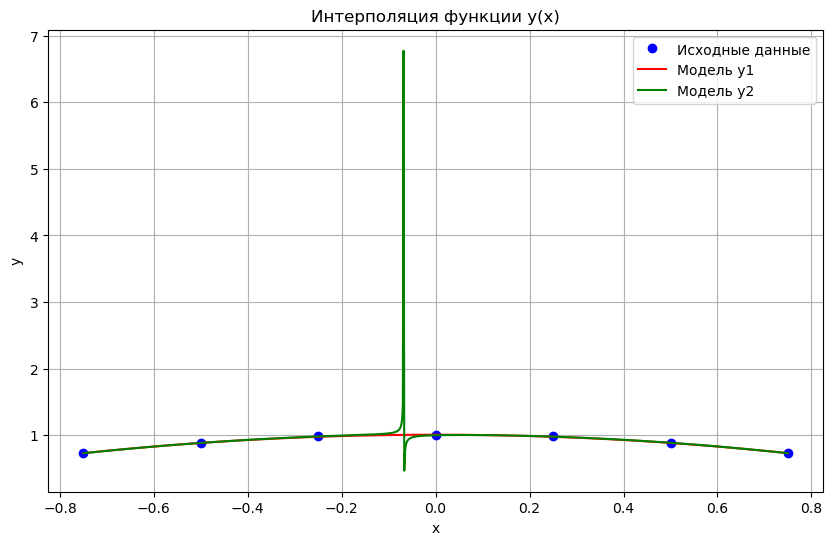

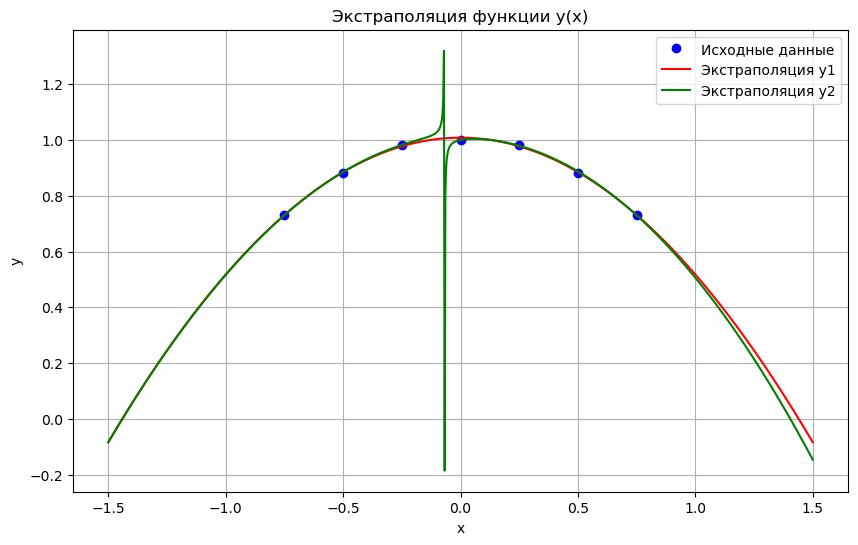

Параметры модели y1: [ 1.00823810e+00 -2.18047802e-12 -4.94933333e-01 -2.18891572e-12
  4.26666666e-03 -2.17026397e-12]
Параметры модели y2: [ 1.00025219 14.81105758 -0.75828241 -7.33054143 14.63944177 -0.37489361]


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Загрузка данных
x4 = np.array([-0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75])
y4 = np.array([0.7316, 0.8823, 0.9835, 1, 0.9835, 0.8823, 0.7316])

# Определение функций для интерполяции
def y1_model(x, p0, p1, p2, p3, p4, p5):
    return p0 + p1*x + p2*x**2 + p3*x**3 + p4*x**4 + p5*x**5

def y2_model(x, p0, p1, p2, p3, q1, q2):
    return (p0 + p1*x + p2*x**2 + p3*x**3) / (1 + q1*x + q2*x**2)

# Подгонка параметров для обеих моделей
popt_y1, pcov_y1 = curve_fit(y1_model, x4, y4)
popt_y2, pcov_y2 = curve_fit(y2_model, x4, y4)

# Вычисление значений функций для построения графиков
x_values = np.linspace(-0.75, 0.75, 1000)
y1_values = y1_model(x_values, *popt_y1)
y2_values = y2_model(x_values, *popt_y2)

# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(x4, y4, 'bo', label='Исходные данные')
plt.plot(x_values, y1_values, 'r-', label='Модель y1')
plt.plot(x_values, y2_values, 'g-', label='Модель y2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Интерполяция функции y(x)')
plt.legend()
plt.grid(True)
plt.show()

# Вычисление значений для экстраполяции
x_extrapolation = np.linspace(-1.5, 1.5, 1000)
y1_extrapolation = y1_model(x_extrapolation, *popt_y1)
y2_extrapolation = y2_model(x_extrapolation, *popt_y2)

# Построение графика экстраполяции
plt.figure(figsize=(10, 6))
plt.plot(x4, y4, 'bo', label='Исходные данные')
plt.plot(x_extrapolation, y1_extrapolation, 'r-', label='Экстраполяция y1')
plt.plot(x_extrapolation, y2_extrapolation, 'g-', label='Экстраполяция y2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Экстраполяция функции y(x)')
plt.legend()
plt.grid(True)
plt.show()

# Вывод параметров моделей
print("Параметры модели y1:", popt_y1)
print("Параметры модели y2:", popt_y2)


Обе модели хорошо соответствуют исходным данным на этом интервале, но графики экстраполяции могут помочь лучше понять, какая из них продолжает тренд за пределами этого интервала.

Чтобы угадать аналитическое выражение для $y(x)$, мы можем визуально анализировать графики и исходные данные. По графику можно предположить, что функция $y(x)$ возрастает на первой половине заданного интервала и имеет параболическую форму, поэтому модель экстраполяции лучше.

# Задача 6. Аппроксимация узлов Чебышева.

Вектора х5 и у5 из архива задают некоторую функцию на равномерной сетке на отрезке $[-1,1] .$

Составьте соответствующий интерполяционный многочлен и постройте его график. Ожидаемо, получившийся интерполянт демонстрирует явление Рунге. Теперь проделайте замену переменной $x \rightarrow s$ по формуле $x=g(s)$, где
$$
g(s)=\frac{1}{53089}\left(40320 s+6720 s^{3}+3024 s^{5}+1800 s^{7}+1225 s^{9}\right)
$$

 функция, приближённо отображающая равномерную сетку в сетку узлов Чебышева. В новой переменной $s$, составьте интерполяционный многочлен $P(s) .$ Постройте график получившейся интерполяции исходной функции $P(s(x))$. Делает ли такая процедура явление Рунге менее выраженным?

## Решение задания 6